In [ ]:
from ba import BAModel
bamodel=BAModel(2)
bamodel.ba_run(1,100)
bamodel.draw()

In [ ]:
from grover import Grover
from qba import QBA
import plot
import write
from networkx import DiGraph
PATH=[(0,0.),(1,1.)]
MAX=1
N=5
# G=Grover([])
# G.complete_graph(N)
# G.grover(MAX,PATH)
# G.arc_plot()
# G=Grover([])
# G.complete_graph(N)
# G.matrix_grover(MAX,PATH)
# G.arc_plot()
qba=QBA().build_circular_ladder_graph(N,PATH)
qba.grover(MAX)
plot.deg_plot(DiGraph(qba.arcs))
#write.write_for_csv(qba,PATH)

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import time
# import plot
# from grover import Grover
# PATH=[(0,1.),(1,-1.)]
# G=Grover([])
# G.complete_graph(3)
# times=[]
# for _ in range(5):
#     time_sta = time.perf_counter()
#     # G.grover(100000,PATH)
#     G.matrix_grover(100000,PATH)
#     G.qba_run(2,PATH)
#     time_end = time.perf_counter()
#     times.append(time_end-time_sta)
# plot.plot_time(times)
# G.make_count_histgram()
# G.deg_plot()

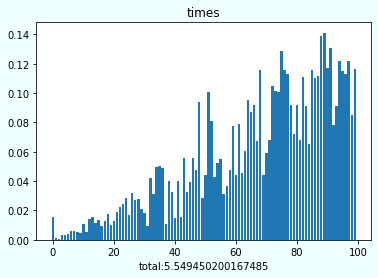

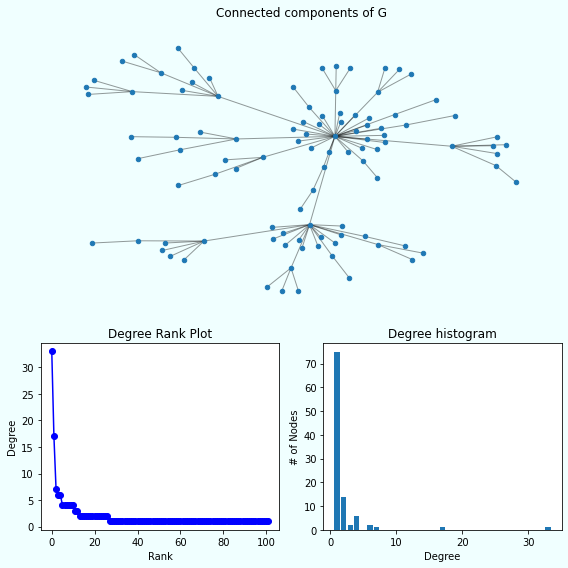

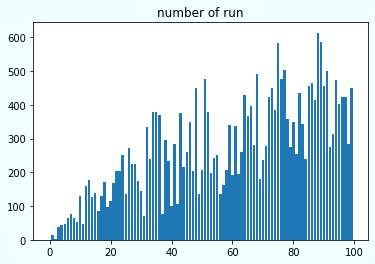

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import time
import plot
from qba import QBA
PATH=[(0,0.7),(1,-0.2)]
# qba=QBA().build_comp_graph(3,PATH)
qba=QBA().build_path_graph(2,PATH)
qba.run_qba(100,5000)

In [ ]:
from ba import BAModel
bamodel=BAModel(2)
bamodel.ba_run(1,500)
bamodel.draw()

not converged
1.2499999999999996


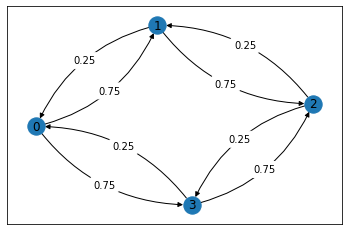

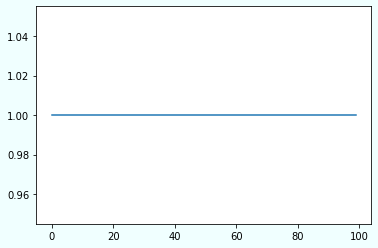

1.0000000000000002 6


In [38]:
import matplotlib.pyplot as plt
import numpy as np
import time
import plot
from qba import QBA

PATH=[(0,1.),(2,0.)]
# qba=QBA().build_comp_graph(3,PATH)
qba=QBA().build_circuit_graph(4,PATH)
prob_vertex=[0,1,2,3]
qba.grover(250,False)
qba.arc_plot()
print(np.sum(qba.weights**2)/2)
qba.non_flow_grover(100,prob_vertex)
qba.plot_origin_prob()

In [ ]:
from qba import QBA
import numpy as np

## 線を刺す
PATH=[]
num_of_v=10
add_v=0
prob_vertex=[0]
num_pin=100
qba=QBA().build_comp_graph(num_of_v,PATH)
for _ in range(num_pin):
    qba.deg=np.append(qba.deg,1)
qba.deg[add_v]+=num_pin
# print(qba.deg)
#qba.arcs.extend([(add_v,num_of_v),(num_of_v,add_v)])
# qba.arcs.extend([(add_v,num_of_v),(num_of_v,add_v),(add_v,num_of_v+1),(num_of_v+1,add_v)])
qba.arcs.extend([(add_v, num_of_v+a) for a in range(num_pin)])
qba.arcs.extend([(num_of_v+a,add_v) for a in range(num_pin)])
qba.weights = np.zeros(len(qba.arcs))
# qba.arc_plot()
for i in range(len(qba.arcs)-num_pin*2):
    qba.weights[i]=1.
# print(qba.arcs)
# qba.arc_plot()
qba.non_flow_grover(100,prob_vertex)
qba.plot_origin_prob()


In [ ]:
from qba import QBA
import numpy as np

# 辺を取って外につける
PATH=[]
num_of_v=5
add_v=0
prob_vertex=[0]
num_pin=1
qba=QBA().build_comp_graph(num_of_v,PATH)
for _ in range(num_pin):
    qba.deg=np.append(qba.deg,1)
# qba.deg=np.append(qba.deg,1)
# qba.deg=np.append(qba.deg,1)
# qba.deg[add_v]+=num_pin
# print(qba.deg)
#qba.arcs.extend([(add_v,num_of_v),(num_of_v,add_v)])
# qba.arcs.extend([(add_v,num_of_v),(num_of_v,add_v),(add_v,num_of_v+1),(num_of_v+1,add_v)])
qba.arcs.extend([(add_v, num_of_v+a) for a in range(num_pin)])
qba.arcs.extend([(num_of_v+a,add_v) for a in range(num_pin)])
print(qba.arcs)
for a in range(num_pin):
    qba.arcs.remove((add_v,add_v+a+1))
    qba.arcs.remove((add_v+a+1,add_v))
    qba.deg[add_v+a+1]-=1
#print(qba.deg)

qba.weights = np.zeros(len(qba.arcs))
qba.arc_plot()
for i in range(len(qba.arcs)-num_pin*2):
    qba.weights[i]=1.
# qba.arc_plot()
qba.non_flow_grover(25,prob_vertex)
qba.plot_origin_prob()


In [ ]:
from qba import QBA
import numpy as np

# 辺をとる
PATH=[]
num_of_v=25
# add_v=0
prob_vertex=[0]
# num_pin=1
remove_arc=(0,1)
qba=QBA().build_comp_graph(num_of_v,PATH)
qba.arcs.remove(remove_arc)
qba.arcs.remove(remove_arc[::-1])
qba.deg[remove_arc[0]]-=1
qba.deg[remove_arc[1]]-=1

# print(qba.deg)
qba.weights = np.zeros(len(qba.arcs))
# qba.arc_plot()
print(qba.arcs)
qba.weights[250]=1.
# for i in range(len(qba.arcs)):
#     qba.weights[i]=1/np.sqrt(len(qba.arcs))
# qba.arc_plot()
qba.non_flow_grover(150,prob_vertex)
# qba.arc_plot()
qba.plot_origin_prob()


In [ ]:
from qba import QBA
import numpy as np

##長いピンを一本刺す 途中
PATH=[]
num_of_v=4
add_v=0
prob_vertex=[0]
num_pin=1
num_pin_len=3
qba=QBA().build_comp_graph(num_of_v,PATH)
for _ in range(num_pin-1):
    qba.deg=np.append(qba.deg,2)
qba.deg[add_v]+=num_pin
# print(qba.deg)
#qba.arcs.extend([(add_v,num_of_v),(num_of_v,add_v)])
# qba.arcs.extend([(add_v,num_of_v),(num_of_v,add_v),(add_v,num_of_v+1),(num_of_v+1,add_v)])
qba.arcs.extend([(add_v, num_of_v+a) for a in range(num_pin)])
qba.arcs.extend([(num_of_v+a,add_v) for a in range(num_pin)])
qba.weights = np.zeros(len(qba.arcs))
# qba.arc_plot()
for i in range(len(qba.arcs)-num_pin*2):
    qba.weights[i]=1.
# qba.arc_plot()
qba.non_flow_grover(2,prob_vertex)
qba.plot_origin_prob()

In [ ]:
from qba import QBA
import numpy as np

PATH=[]
num_of_v_n=2
num_of_v_m=3
add_v=0
prob_vertex=[a for a in range(num_of_v_n)]
num_pin=1
# prob_vertex=[a for a in range(num_of_v_n, num_of_v_m+num_of_v_n)]
# prob_vertex=[0]
qba=QBA().build_comp_biber_graph(num_of_v_n,num_of_v_m,PATH)
qba.deg=np.append(qba.deg,1)
qba.deg[add_v]+=1
qba.arcs.extend([(add_v,num_of_v_n+num_of_v_m),(num_of_v_n+num_of_v_m, add_v)])
qba.weights = np.zeros(len(qba.arcs))
# for i in range(len(qba.arcs)-2):
#     qba.weights[i]=1.
qba.arc_plot()
qba.non_flow_grover(100,prob_vertex,num_pin)
qba.plot_origin_prob()

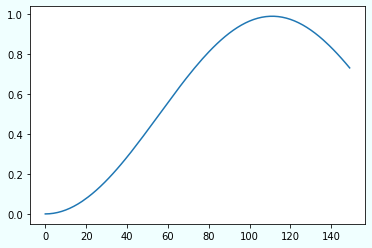

0.9901975095680448 111


In [3]:
from qba import QBA
import numpy as np

## 刺した場所の重みを反転させる
PATH=[]
num_of_v=100
add_v=num_of_v-1
prob_vertex=[num_of_v-1]
num_pin=1
qba=QBA().build_comp_graph(num_of_v,PATH)
#qba=QBA().build_wheel_graph(num_of_v,PATH)
# qba=QBA().build_path_graph(num_of_v,PATH)
# qba=QBA().build_circuit_graph(num_of_v,PATH)
for _ in range(num_pin):
    qba.deg=np.append(qba.deg,1)
qba.deg[add_v]+=num_pin
#print(qba.deg)
qba.arcs.extend([(add_v, num_of_v+a) for a in range(num_pin)])
qba.arcs.extend([(num_of_v+a,add_v) for a in range(num_pin)])
qba.weights = np.zeros(len(qba.arcs))
# print(qba.arcs)
# qba.arc_plot()
for i in range(len(qba.arcs)-num_pin*2):
    qba.weights[i]=1.
# qba.arc_plot()
    
# qba.non_flow_grover(140,prob_vertex,num_pin,True)
# qba.plot_origin_prob()

prob_arcs=[(add_v, num_of_v+a) for a in range(num_pin) ] + [(num_of_v+a, add_v) for a in range(num_pin) ]
# prob_arcs=[(num_of_v+a, add_v) for a in range(num_pin) ]
qba.non_flow_grover_arcs(150,prob_arcs,num_pin,True)
qba.plot_origin_prob()

[(0, 50), (50, 0)]


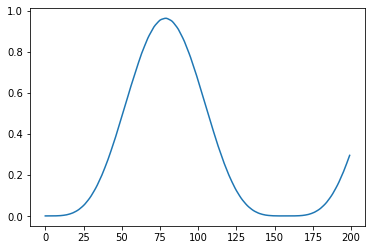

0.9625017670848108 79
[(49, 51), (51, 49)]


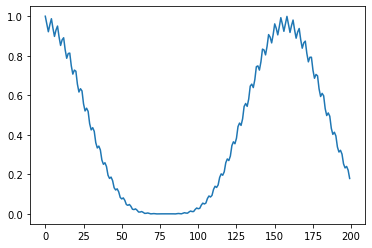

1.0 0


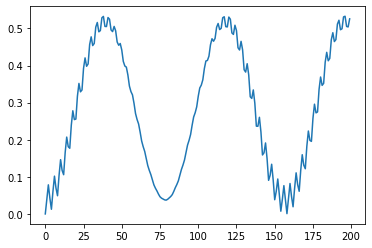

0.5328837648320748 196


In [19]:
from qba import QBA
import numpy as np

## 刺した場所の重みを反転させる
## HSPを考えてみる
PATH=[]
num_of_v=50
add_v=[0, num_of_v-1]
# add_v=num_of_v-1
prob_vertex=[num_of_v-1]
num_pin=1
qba=QBA().build_comp_graph(num_of_v,PATH)

for _ in range(num_pin*len(add_v)):
    qba.deg=np.append(qba.deg,1)
for i in add_v:
    qba.deg[i]+=num_pin

# for _ in range(num_pin):
#     qba.deg=np.append(qba.deg,1)
# qba.deg[0]+=num_pin
# print(qba.deg)
count=-1
for i in add_v:
    count+=1
    for j in range(num_pin):
        qba.arcs.extend([(i, num_of_v+j+count*num_pin) for a in range(num_pin)])
        qba.arcs.extend([(num_of_v+j+count*num_pin, i) for a in range(num_pin)])
# qba.arcs.extend([(0, num_of_v+a) for a in range(num_pin)])
# qba.arcs.extend([(num_of_v+a,0) for a in range(num_pin)])
# qba.arcs.extend([(2, num_of_v+num_pin+a) for a in range(num_pin)])
# qba.arcs.extend([(num_of_v+num_pin+a,2) for a in range(num_pin)])
qba.weights = np.zeros(len(qba.arcs))
# print(qba.arcs)
# qba.arc_plot()

# for i in range(len(qba.arcs)-num_pin*2*len(add_v)):
#     qba.weights[i]=1.


qba.weights[len(qba.arcs)-num_pin*2]=1
qba.weights[len(qba.arcs)-num_pin*2+1]=-1


# qba.weights[len(qba.arcs)-num_pin*4]=1
# qba.weights[len(qba.arcs)-num_pin*4+1]=1
# qba.weights[len(qba.arcs)-4]=1
# qba.arc_plot()
# print(qba.arcs)
# qba.non_flow_grover(140,prob_vertex,num_pin,True)
# qba.plot_origin_prob()

prob_arcs=[(add_v[0], num_of_v+a) for a in range(num_pin) ] + [(num_of_v+a, add_v[0]) for a in range(num_pin)]
print(prob_arcs)
# prob_arcs=[(0,20)]+[(20,0)]
qba.non_flow_grover_arcs_test(200,prob_arcs,add_v,num_pin,True)
qba.plot_origin_prob()


qba.weights = np.zeros(len(qba.arcs))
# print(qba.arcs)
# qba.arc_plot()
# for i in range(len(qba.arcs)-num_pin*2*len(add_v)):
#     qba.weights[i]=1.
qba.weights[len(qba.arcs)-num_pin*2]=1
qba.weights[len(qba.arcs)-num_pin*2+1]=-1
prob_arcs=[(add_v[1], num_of_v+a+1) for a in range(num_pin) ] + [(num_of_v+a+1, add_v[1]) for a in range(num_pin)]
print(prob_arcs)
qba.non_flow_grover_arcs_test(200,prob_arcs,add_v,num_pin,True)
qba.plot_origin_prob()


qba.weights = np.zeros(len(qba.arcs))
# print(qba.arcs)
# qba.arc_plot()
# for i in range(len(qba.arcs)-num_pin*2*len(add_v)):
#     qba.weights[i]=1.
qba.weights[len(qba.arcs)-num_pin*2]=1
qba.weights[len(qba.arcs)-num_pin*2+1]=-1
# prob_arcs=[(add_v[1], num_of_v+a+1) for a in range(num_pin) ] + [(num_of_v+a+1, add_v[1]) for a in range(num_pin)]
prob_arcs=[(a,b) for a in range(num_of_v) for b in range(num_of_v)]
for a in range(num_of_v):
    prob_arcs.remove((a,a))
# print(prob_arcs)
qba.non_flow_grover_arcs_test(200,prob_arcs,add_v,num_pin,True)
qba.plot_origin_prob()

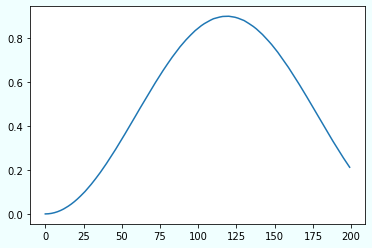

0.8974562257901302 120


In [6]:
from qba import QBA
import numpy as np

## 刺した場所の重みを反転させる
## hypercube 用
PATH=[]
dim=10
add_v=0
num_pin=1
prob_vertex=[0]
# qba=QBA().build_comp_graph(dim,PATH)
# qba=QBA().build_wheel_graph(dim,PATH)
qba=QBA().build_hypercube(dim,PATH)
for _ in range(num_pin):
    qba.deg=np.append(qba.deg,1)
qba.deg[add_v]+=num_pin
#print(qba.deg)
qba.arcs.extend([(add_v, 2**dim+a) for a in range(num_pin)])
qba.arcs.extend([(2**dim+a,add_v) for a in range(num_pin)])
qba.weights = np.zeros(len(qba.arcs))
# print(qba.arcs)
# qba.arc_plot()
for i in range(len(qba.arcs)-num_pin*2):
    qba.weights[i]=1.
# qba.arc_plot()
# qba.non_flow_grover(100,prob_vertex,num_pin,True)
# qba.plot_origin_prob()

# prob_arcs=[(j, 0) for j in range(1,dim+1)]
prob_arcs=[(0, 2**dim+a) for a in range(num_pin)] + [(2**dim+a, 0) for a in range(num_pin)]
# print(prob_arcs)
# prob_arcs=[(0, 2**dim), (2**dim, 0)]
# qba.arc_plot()
qba.non_flow_grover_arcs(200,prob_arcs,num_pin,True)
qba.plot_origin_prob()

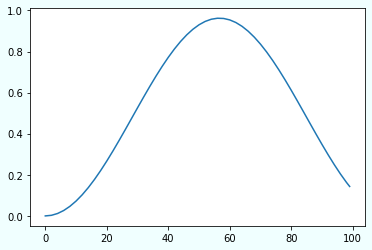

0.9619861396320397 56


In [18]:
from qba import QBA
import numpy as np

## 刺した場所の重みを反転させる
## 完全二部
PATH=[]
num_of_v_1=50
num_of_v_2=25
add_v=0
prob_vertex=[0]
num_pin=1
qba=QBA().build_comp_biber_graph(num_of_v_1,num_of_v_2,PATH)
for _ in range(num_pin):
    qba.deg=np.append(qba.deg,1)
qba.deg[add_v]+=num_pin
#print(qba.deg)
qba.arcs.extend([(add_v, num_of_v_1+num_of_v_2+a) for a in range(num_pin)])
qba.arcs.extend([(num_of_v_1+num_of_v_2+a,add_v) for a in range(num_pin)])
qba.weights = np.zeros(len(qba.arcs))
# print(qba.arcs)
# qba.arc_plot()
for i in range(len(qba.arcs)-num_pin*2):
    qba.weights[i]=1.
# qba.arc_plot()
# qba.non_flow_grover(100,prob_vertex,num_pin,True)
# qba.plot_origin_prob()

prob_arcs=[(add_v, num_of_v_1+num_of_v_2+a) for a in range(num_pin) ] + [(num_of_v_1+num_of_v_2, add_v) for a in range(num_pin) ]
# print(prob_arcs)
qba.non_flow_grover_arcs(100,prob_arcs,num_pin,True)
qba.plot_origin_prob()

In [ ]:
from qba import QBA
import numpy as np

## 完全グラフ二つくっつける
### ミス
PATH=[]
n=3
m=5
prob_vertex=[n-1]
qba=QBA().build_comp_add_graph(n,m,PATH)
qba.weights = np.zeros(len(qba.arcs))
qba.arc_plot()
print(qba.deg)
for i in range(len(qba.arcs)):
    if qba.arcs[i][0]<n and qba.arcs[i][1]<n:
        qba.weights[i]=1.
    # qba.weights[i]=1.
#qba.arc_plot()
# qba.non_flow_grover(300,prob_vertex)
# qba.plot_origin_prob()

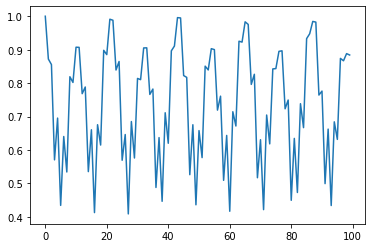

1.0 0


In [24]:
from qba import QBA
import numpy as np

## 完全グラフn個繋げる
PATH=[]
n=[5,30]
# prob_vertex=[0,1,2,3,4,5,6,7,8,9]
prob_vertex=[i for i in range(n[0])]
# print(prob_vertex)
qba=QBA().build_barbell_graph(n,PATH)
qba.weights = np.zeros(len(qba.arcs))
# qba.arc_plot()
#print(qba.deg)
# print(qba.arcs)
for i in range(len(qba.arcs)):
    if qba.arcs[i][0]<n[0] and qba.arcs[i][1]<n[0]:
        qba.weights[i]=1.
    # qba.weights[i]=1.
#qba.arc_plot()
qba.non_flow_grover(100,prob_vertex)
qba.plot_origin_prob()

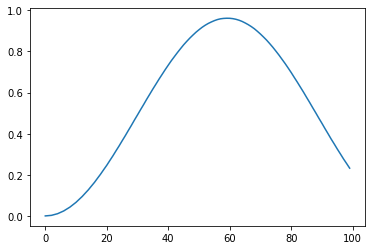

0.9617600914321942 59
0.23230680387583244
[0.000 0.001 0.003 0.007 0.011 0.017 0.024 0.034 0.043 0.054 0.066 0.080
 0.094 0.111 0.127 0.145 0.163 0.184 0.204 0.225 0.246 0.270 0.292 0.317
 0.340 0.365 0.390 0.415 0.440 0.467 0.492 0.517 0.542 0.568 0.593 0.618
 0.641 0.666 0.689 0.712 0.734 0.755 0.775 0.795 0.814 0.832 0.849 0.865
 0.880 0.894 0.906 0.918 0.928 0.936 0.944 0.950 0.955 0.959 0.961 0.962
 0.961 0.960 0.957 0.952 0.946 0.939 0.931 0.921 0.911 0.898 0.885 0.870
 0.855 0.838 0.821 0.802 0.783 0.762 0.742 0.720 0.697 0.673 0.650 0.626
 0.602 0.577 0.552 0.526 0.501 0.475 0.450 0.424 0.399 0.374 0.350 0.325
 0.301 0.277 0.255 0.232]


In [4]:
from qba import QBA
import numpy as np
import math

## 刺した場所の重みを反転させる
## Johnson
PATH=[]
n=15
k=2
num_of_v=math.comb(n,k)
add_v=0
prob_vertex=[add_v]
num_pin=1
# qba=QBA().build_comp_graph(num_of_v,PATH)
qba=QBA().build_Johnson_graph(n,k,PATH)
for _ in range(num_pin):
    qba.deg=np.append(qba.deg,1)
qba.deg[add_v]+=num_pin
# print(qba.deg)
qba.arcs.extend([(add_v, num_of_v+a) for a in range(num_pin)])
qba.arcs.extend([(num_of_v+a,add_v) for a in range(num_pin)])
qba.weights = np.zeros(len(qba.arcs))
# print(qba.arcs)
# qba.arc_plot()
for i in range(len(qba.arcs)-num_pin*2):
    qba.weights[i]=1.
# for i in range(len(qba.arcs)-num_pin*2, len(qba.arcs)-num_pin):
#     qba.weights[i]=1.
# for i in range(len(qba.arcs)-num_pin, len(qba.arcs)):
#     qba.weights[i]=-1.
# qba.arc_plot()
    
# qba.non_flow_grover(200,prob_vertex,num_pin,True)
# qba.plot_origin_prob()

prob_arcs=[(add_v, num_of_v+a) for a in range(num_pin) ] + [(num_of_v+a, add_v) for a in range(num_pin) ]
qba.non_flow_grover_arcs(100,prob_arcs,num_pin,True)
qba.plot_origin_prob()

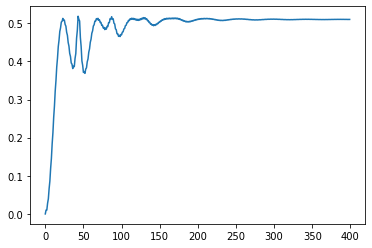

0.5183977499857243 43


In [2]:
from qba import QBA
import numpy as np

## 刺した場所の重みを反転させる
## 完全グラフ上流出入

num_of_v=100
PATH=[(a, 1.) for a in range(num_of_v)]
prob_vertex=[0]
qba=QBA().build_comp_graph(num_of_v,PATH)
#qba=QBA().build_wheel_graph(num_of_v,PATH)
# qba=QBA().build_path_graph(num_of_v,PATH)
# qba=QBA().build_circuit_graph(num_of_v,PATH)
qba.weights = np.zeros(len(qba.arcs))
# qba.arc_plot()
# print(qba.arcs)
qba.grover(400, prob_vertex)
qba.plot_origin_prob()


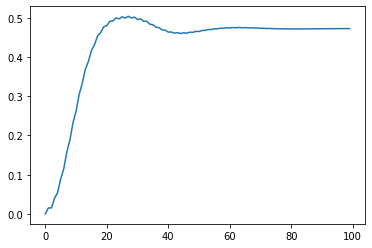

0.5038655095200216 27
0.47246328388620173


In [15]:
from qba import QBA
import numpy as np
import math

## 流出入与える
## Johnson
n=12
k=2
num_of_v=math.comb(n,k)
PATH=[(a, 1.) for a in range(num_of_v)]
# inverse_vertex=[i for i in range(math.comb(n-k,k), num_of_v)]
inverse_vertex=[0]
prob_vertex=[0]
# prob_vertex=[i for i in range(math.comb(n-k,k), num_of_v)]
# qba=QBA().build_comp_graph(num_of_v,PATH)
qba=QBA().build_Johnson_graph(n,k,PATH)
qba.weights = np.zeros(len(qba.arcs))
# qba.arc_plot()
# print(qba.arcs)
# print(qba.deg)
qba.grover(100, inverse_vertex, prob_vertex)
qba.plot_origin_prob()

In [ ]:
import numpy as np
import cmath

N=10

mat=np.array([[(2*N-4)/(N-1)-1, 2*np.sqrt(N-2)/(N-1),0,0,0],
              [0,0,(2*np.sqrt(N-1))/N,0,((2*N-2)/N)-1],
              [0,0,0,-1,.0],
              [0,0,2/N-1,0,(2*np.sqrt(N-1))/N],
              [2*np.sqrt(N-2)/(N-1),2/(N-1)-1,0,0,0]])
# print(mat)
# print(np.linalg.eig(mat))
ramda_p=((N-2)/(N-1)+np.sqrt((N*N*N-4*N+4)/(N*(N-1)*(N-1))))/2
ramda_m=((N-2)/(N-1)-np.sqrt((N*N*N-4*N+4)/(N*(N-1)*(N-1))))/2
theta_p=np.arccos(ramda_p)
theta_m=np.arccos(ramda_m)
alpha_p=1/(np.sqrt(1/N+ramda_p*ramda_p))
alpha_m=1/(np.sqrt(1/N+ramda_m*ramda_m))
B_star_f_p=np.array([alpha_p*np.sqrt((N-2)/(N*(N-1)))*ramda_p,
                     alpha_p*ramda_p/np.sqrt(N-1),
                     alpha_p/N,
                     0,
                     alpha_p*np.sqrt(N-1)/N])
SB_star_f_p=np.array([alpha_p*np.sqrt((N-2)/(N*(N-1)))*ramda_p,
                     alpha_p*np.sqrt(N-1)/N,
                     0,
                     alpha_p/N,
                     alpha_p*ramda_p/np.sqrt(N-1)])
B_star_f_m=np.array([alpha_m*np.sqrt((N-2)/(N*(N-1)))*ramda_m,
                     alpha_m*ramda_m/np.sqrt(N-1),
                     alpha_m/N,
                     0,
                     alpha_m*np.sqrt(N-1)/N])
SB_star_f_m=np.array([alpha_m*np.sqrt((N-2)/(N*(N-1)))*ramda_m,
                     alpha_m*np.sqrt(N-1)/N,
                     0,
                     alpha_m/N,
                     alpha_m*ramda_m/np.sqrt(N-1)])
spec_U=np.exp(complex(0,theta_m))
ei_vec_p=(B_star_f_p-np.exp(complex(0,theta_p))*SB_star_f_p)/(np.sqrt(2)*np.abs(theta_p))
ei_vec_m=(B_star_f_m-np.exp(complex(0,theta_m))*SB_star_f_m)/(np.sqrt(2)*np.abs(theta_m))
# ei_vec_p=ei_vec_p/np.linalg.norm(ei_vec_p,2)
# ei_vec_1=np.array([1,
#                    -np.sqrt(N-2),
#                    np.sqrt((N-1)*(N-2)),
#                    np.sqrt((N-1)*(N-2)),
#                    -np.sqrt(N-2)])/np.sqrt(2*N*N-4*N+1)
# ei_vec_p=np.array([np.sqrt((N-2)/(N*(N-1)))*(1-np.exp(complex(0,theta_p))),
#                    np.sqrt((N-1)/(N))*(1/(N-1)+ramda_m*np.exp(complex(0,theta_p))),
#                    -ramda_m/(np.sqrt(N)),
#                    (ramda_m*np.exp(complex(0,theta_p)))/(np.sqrt(N)),
#                    (1/(np.sqrt(N*(N-1))))*(-(N-1)*ramda_m-np.exp(complex(0,theta_p)))])/(np.sqrt(2)*np.abs(np.sin(theta_p)))
# print(ramda_p,ramda_m)
# print(theta_p,theta_m)
# print(np.exp(complex(0,theta_p)))
print(ei_vec_p)
# print(B_star_f_p)
# print(alpha_p)
# print(np.linalg.norm(B_star_f_p,2))
# print(np.linalg.norm(SB_star_f_p,2))
# print(np.linalg.norm(ei_vec_p,2))
# print(mat@mat.T)

mat_T=np.array([[(N-2)/(N-1),1/(np.sqrt(N))],
                [1/(np.sqrt(N)),0]])
# ei_vec_p_T=np.array([ramda_p,1/(np.sqrt(N))])*alpha_p
# ei_vec_m_T=np.array([ramda_m,1/(np.sqrt(N))])*alpha_m
# print(ei_vec_p_T,ei_vec_m_T)
# print(mat_T)
# print(np.linalg.eig(mat_T))
# print(ei_vec_p_T,mat_T@ei_vec_p_T)

In [17]:
import math
m=5
N=220
k=3

print(math.pi*math.sqrt(k*(math.factorial(k))**(1/k))*math.sqrt(N**(1+1/k))/(2*math.sqrt(2*m)))

42.26564490620507


In [17]:
import math
N=455
print(math.pow(N,1/2)*math.log(N))

130.5504056901779
